In [630]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,BatchNormalization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical


In [631]:
# Daten einlesen
data = pd.read_csv('painting_01.csv')

In [632]:
data.tail()

,R1_1,R1_3,R1_5,R1_7,R1_9,R1_11,R4_1,R4_3,R4_5,R4_7,R4_9,R4_11,class,activity
170,0.008125,0.002411,0.012958,0.009891,0.010046,0.035462,0.005548,0.012807,0.027036,0.000387,0.018267,0.015439,0,pause
171,0.007667,0.002635,0.012903,0.009587,0.010011,0.035232,0.005534,0.013295,0.027104,0.000961,0.018685,0.015555,0,pause
172,0.007452,0.002208,0.012922,0.009497,0.009366,0.034877,0.005336,0.013462,0.027142,0.000776,0.018636,0.015568,0,pause
173,0.008400,0.001809,0.013475,0.008897,0.009498,0.033369,0.006055,0.013149,0.026392,0.001794,0.018976,0.015479,0,pause
174,0.008356,0.002007,0.013028,0.008385,0.009358,0.034564,0.005684,0.012877,0.026788,0.001418,0.019216,0.015194,0,pause


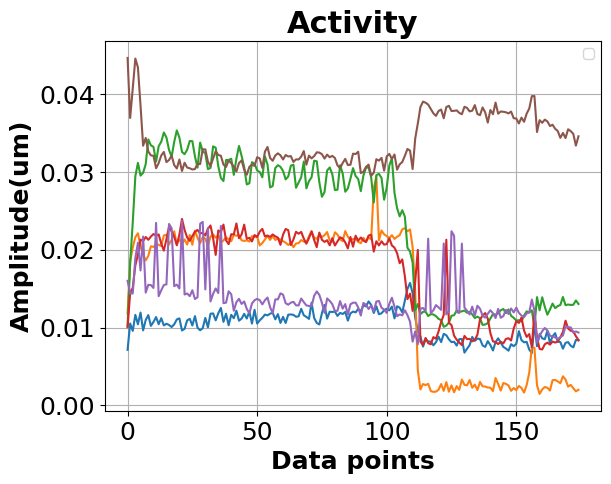

In [633]:

plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(['R1_1'])

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(data.index, data[['R1_1','R1_3', 'R1_5', 'R1_7', 'R1_9', 'R1_11']])

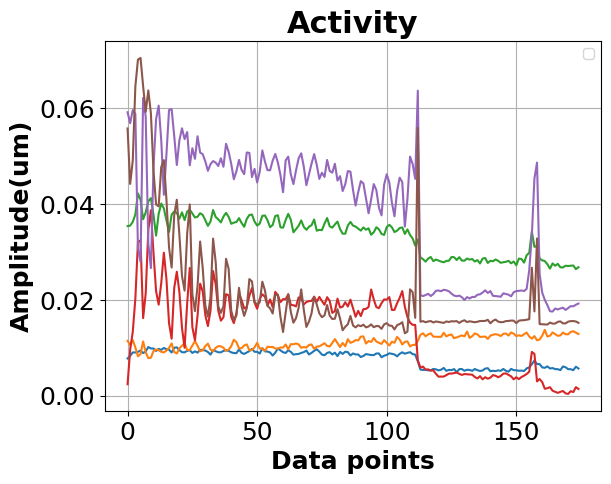

In [634]:
plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(['R1_1'])

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(data.index, data[['R4_1','R4_3', 'R4_5', 'R4_7', 'R4_9', 'R4_11', ]])

In [635]:
X = data.drop(['class', 'activity'], axis=1)
y = data['class']

In [636]:
X

,R1_1,R1_3,R1_5,R1_7,R1_9,R1_11,R4_1,R4_3,R4_5,R4_7,R4_9,R4_11
0,0.007135,0.011782,0.010183,0.010032,0.016003,0.044630,0.007779,0.011447,0.035353,0.002412,0.059075,0.055706
1,0.010521,0.018473,0.018318,0.014442,0.014373,0.036914,0.008326,0.010548,0.035452,0.009585,0.056812,0.044146
2,0.009569,0.020290,0.023501,0.015097,0.014382,0.040771,0.009035,0.011613,0.036246,0.013319,0.059518,0.048992
3,0.011631,0.021607,0.029435,0.017994,0.018940,0.044553,0.009020,0.010074,0.037778,0.020195,0.058763,0.064438
4,0.010421,0.022111,0.031152,0.019377,0.020891,0.043398,0.009162,0.008225,0.042163,0.032071,0.030729,0.070045
...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.008125,0.002411,0.012958,0.009891,0.010046,0.035462,0.005548,0.012807,0.027036,0.000387,0.018267,0.015439
171,0.007667,0.002635,0.012903,0.009587,0.010011,0.035232,0.005534,0.013295,0.027104,0.000961,0.018685,0.015555
172,0.007452,0.002208,0.012922,0.009497,0.009366,0.034877,0.005336,0.013462,0.027142,0.000776,0.018636,0.015568
173,0.008400,0.001809,0.013475,0.008897,0.009498,0.033369,0.006055,0.013149,0.026392,0.001794,0.018976,0.015479


In [637]:
# Feature Scaling (optional, aber oft empfohlen für LSTM-Modelle)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [638]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [639]:
# Überprüfe die Form der Eingabedaten
print("Shape von X_train", X_train.shape)

Shape von X_train (140, 12)


In [640]:
model = Sequential()
model.add(LSTM(256, input_shape=(12, 1), return_sequences=True, kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True, kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(LSTM(64, kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer='l2')) #fully connected layer
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [641]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [642]:
print(model.summary())


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 12, 256)           264192    
                                                                 
 dropout_118 (Dropout)       (None, 12, 256)           0         
                                                                 
 lstm_115 (LSTM)             (None, 12, 128)           197120    
                                                                 
 dropout_119 (Dropout)       (None, 12, 128)           0         
                                                                 
 lstm_116 (LSTM)             (None, 64)                49408     
                                                                 
 dropout_120 (Dropout)       (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)              

In [643]:
#y_train and y_test are integer class labels (0 or 1)
y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)

In [644]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_data=(X_test, y_test_encoded), verbose=1)

Epoch 1/100


9/9 [==============================] - 8s 207ms/step - loss: 5.5516 - accuracy: 0.9071 - val_loss: 4.5624 - val_accuracy: 0.9714
Epoch 2/100
9/9 [==============================] - 0s 42ms/step - loss: 4.0124 - accuracy: 0.9857 - val_loss: 3.4622 - val_accuracy: 0.9714
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 3.0229 - accuracy: 0.9929 - val_loss: 2.6657 - val_accuracy: 0.9714
Epoch 4/100
9/9 [==============================] - 0s 49ms/step - loss: 2.3049 - accuracy: 0.9929 - val_loss: 2.0402 - val_accuracy: 0.9714
Epoch 5/100
9/9 [==============================] - 0s 54ms/step - loss: 1.7365 - accuracy: 0.9929 - val_loss: 1.5500 - val_accuracy: 0.9714
Epoch 6/100
9/9 [==============================] - 0s 41ms/step - loss: 1.3222 - accuracy: 0.9929 - val_loss: 1.1801 - val_accuracy: 0.9714
Epoch 7/100
9/9 [==============================] - 0s 44ms/step - loss: 1.0197 - accuracy: 0.9929 - val_loss: 0.9288 - val_accuracy: 0.9714
Epoch 8/100
9/9 [==============

In [645]:
# Evaluieren des Modells
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


2/2 [==============================] - 1s 10ms/step


In [646]:
threshold = 0.5
y_pred_labels_binary = (y_pred_labels >= threshold).astype(int)


In [648]:
# Berechne die Genauigkeit
accuracy = accuracy_score(y_test, y_pred_labels_binary)

In [652]:
for pred_label, true_label in zip(y_pred_labels_binary, y_test):
    print("Predicted Class:", pred_label)
    print("True Class:", true_label)
    print("------------------------------------------------------")
print("accuracy", accuracy)


Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 1
True Class: 1
------------------------------------------------------
Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 1
True Class: 1
------------------------------------------------------
Predicted Class: 1
True Class: 1
------------------------------------------------------
Predicted Class: 0
True Class: 0
------------------------------------------------------
Predicted Class: 1
True Class: 1
------------------------------------------------------
Predicted Class: 0
True Class: 1
------------------------------------------------------
Predicted Class: 1
True Class: 1